In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches


In [3]:
dem = xr.open_dataset("/scratch/wrudisill/EastLSM_Only/most_recent_aso_data/swedata/og_grid/3mdem_upsample_50m_East_latlon.nc")
dem = dem.where(dem.Band1>0)
#dem.Band1.plot(

In [214]:
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")
east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)
other_mask = geog.OTHR_MASK.where(geog.OTHR_MASK >0)

In [25]:
# open up all of the swe data ... 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")
swe1=xr.open_dataset(aso_dat1)
swevar1 = swe1.where(swe1>0).Band1*1000
# use the thompson density 
mask18 = swevar1.where(swevar1 > 0, np.nan)
mask18 = mask18/mask18
mask18 = (mask18 * other_mask)


In [49]:
def get_wrf_xy(lat, lon):
    #lat = 38.89
    #lon = -106.95
    xlat = geog.XLAT_M.values[0,:,:]
    xlon = geog.XLONG_M.values[0,:,:]
    dist = np.sqrt((xlat - lat)**2 + (xlon - lon)**2)
    mindist = dist.min()
    ixlat = np.argwhere(dist == mindist)[0][0]
    ixlon = np.argwhere(dist == mindist)[0][1]
    return ixlat, ixlon



In [67]:
geog


<xarray.Dataset>
Dimensions:     (Time: 1, south_north: 239, west_east: 179,
                 south_north_stag: 240, west_east_stag: 180, land_cat: 21,
                 soil_cat: 16, month: 12, num_urb_params: 132,
                 dust_erosion_dimension: 3)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month,
                                num_urb_params, dust_erosion_dimension
Data variables: (12/64)
    Times       (Time) |S19 b'0000-00-00_00:00:00'
    XLAT_M      (Time, south_north, west_east) float32 38.61 38.61 ... 39.15
    XLONG_M     (Time, south_north, west_east) float32 -107.2 -107.2 ... -106.7
    XLAT_V      (Time, south_north_stag, west_east) float32 38.61 ... 39.15
    XLONG_V     (Time, south_north_stag, west_east) float32 -107.2 ... -106.7
    XLAT_U      (Time, south_north, west_east_stag) float32 38.61 ... 39.15
    ...          ...
    SANDFRAC    (Time, south_north, west_east) float32 0.4443 0.4432 ... 0.47
    EAST_MASK   (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    OTHR_MASK   (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    DEMDIFF     (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    slope       (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
    aspect      (Time, south_north, west_east) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes: (12/54)
    TITLE:                           OUTPUT FROM GEOGRID V4.1
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        180
    SOUTH-NORTH_GRID_DIMENSION:      240
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    FLAG_URB_PARAM:                  1
    FLAG_IMPERV:                     1
    FLAG_CANFRA:                     1
    FLAG_EROD:                       1
    FLAG_CLAYFRAC:                   1
    FLAG_SANDFRAC:                   1

In [271]:
## 21 colors 

# Evergreen Needleleaf Forest
# Evergreen Broadleaf Forest
# Deciduous Needleleaf Forest
# Deciduous Broadleaf Forest
# Mixed Forests
# Closed Shrublands
# Open Shrublands
# Woody Savannas
# Savannas
# Grasslands
# Permanent Wetlands
# Croplands
# Urban and Built-Up
# Cropland/Natural Vegetation Mosaic
# Snow and Ice
# Barren or Sparsely Vegetated
# Water
# Wooded Tundra
# Mixed Tundra
# Barren Tundra
# Other

import matplotlib as mpl

#array([ 1.,  4.,  5.,  7.,  8.,  9., 10., 12., 18., nan])

custom = np.array([[13, 188, 23, 1],     #1 Evergreen Needleleaf Forest
                   [56, 226, 25, 1],     # 4Deciduous Broadleaf Forest
                   [178, 192, 137, 1],   #5 Mixed Forests
                   [223, 226, 190, 1],   #7 Open Shrublands
                   [240, 247, 147, 1],   #8 Woody Savannas
                   [226, 243, 156, 1],   #9 Savannas
                   [246, 249, 216, 1],   #10 Grasslands
                   [242, 234, 7, 1],     #12 Croplands
                   [88, 106, 99, 1]])     # 18 Wooded Tundra
                     
                  
cblabs = ["Evergreen Needleleaf", "Deciduous Broadleaf", "Mixed Forests", "Open Shrublands", "Woody Savannas", "Savannas", "Grasslands", "Croplands", "Wooded Tundra"]


# must be between 0 and 1 for matplotlib ...
custom = (custom)/255
custom[:,-1] = 1.0
lulc_cmap = mpl.colors.LinearSegmentedColormap.from_list('name', custom, len(custom))



In [269]:
unq = np.unique(geog.LU_INDEX  * mask18)
unq

array([ 1.,  4.,  5.,  7.,  8.,  9., 10., 12., 18., nan])

In [215]:
def fix_lu(lu):
    k=1
    lu_o = np.zeros_like(lu) 
    for i in np.unique(lu):
        lu_o = lu_o + np.where(lu == i, k, 0.0)
        k+=1 
    return lu_o

In [216]:
unq = np.unique(geog.LU_INDEX  * mask18)
lufx = fix_lu((geog.LU_INDEX  * mask18).isel(Time=0).values)

geog["LUIFX"] = geog["LU_INDEX"]
geog["LUIFX"].values[0,:,:] = lufx

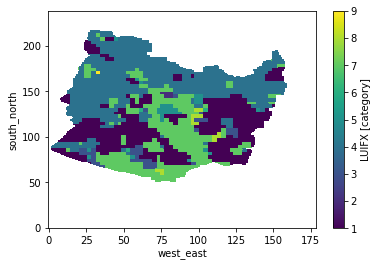

In [218]:
geog["LUIFX"].where(geog["LUIFX"] >0).plot()

In [90]:


lu_table_usgs = {
  1:"Evergreen Needleleaf Forest",
  2:"Evergreen Broadleaf Forest",
  3:"Deciduous Needleleaf Forest",
  4:"Deciduous Broadleaf Forest",
  5:"Mixed Forests",
  6:"Closed Shrublands",
  7:"Open Shrublands",
  8:"Woody Savannas",
  9:"Savannas",
  10: "Grasslands",
  11: "Permanent Wetlands",
  12: "Croplands",
  13: "Urban and Built-Up",
  14: "Cropland/Natural Vegetation Mosaic",
  15: "Snow and Ice",
  16: "Barren or Sparsely Vegetated",
  17: "Water",
  18: "Wooded Tundra",
  19: "Mixed Tundra",
  20: "Barren Tundra",
  21: "Other"}
names = list(lu_table_usgs.values())
names

['Evergreen Needleleaf Forest',
 'Evergreen Broadleaf Forest',
 'Deciduous Needleleaf Forest',
 'Deciduous Broadleaf Forest',
 'Mixed Forests',
 'Closed Shrublands',
 'Open Shrublands',
 'Woody Savannas',
 'Savannas',
 'Grasslands',
 'Permanent Wetlands',
 'Croplands',
 'Urban and Built-Up',
 'Cropland/Natural Vegetation Mosaic',
 'Snow and Ice',
 'Barren or Sparsely Vegetated',
 'Water',
 'Wooded Tundra',
 'Mixed Tundra',
 'Barren Tundra',
 'Other']

150 169


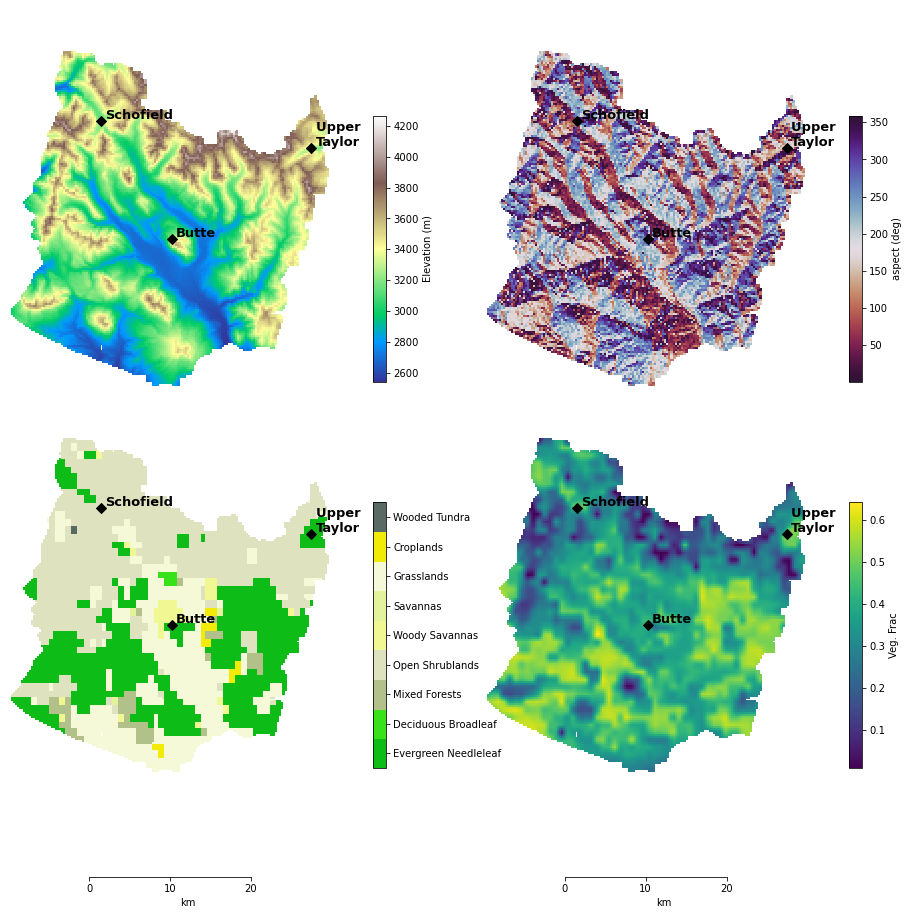

In [318]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(18,16)
n = len(names)
(geog.HGT_M     * mask18).plot(cmap='terrain', ax=ax[0,0],            cbar_kwargs={"label":"Elevation (m)", "shrink":.55, "pad":-.15})
(geog.aspect    * mask18).plot(ax=ax[0,1], cmap='twilight_shifted_r', cbar_kwargs={"label":"aspect (deg)",  "shrink":.55, "pad":-.15})


a = geog["LUIFX"].where(geog["LUIFX"] >0).plot(ax=ax[1,0], cmap=lulc_cmap, vmax=10, add_colorbar = False)
cbar = fig.colorbar(a, ax=ax[1,0], shrink=.55, pad=-.15)
cbar.set_ticks(np.linspace(1.5,9.5,9))
cbar.set_ticklabels(cblabs)


# do the greenfrac...                               
(geog.GREENFRAC.mean(dim='month')* mask18).plot(ax=ax[1,1], cbar_kwargs={"label":"Veg. Frac", "shrink":.55, "pad":-.15})

lats  = [38.89,    39.02,   38.99]                  #  38.95231, 38.9535
lons  = [-106.95, -107.05, -106.75]                 # -106.9856, -106.903
names = ["Butte", "Schofield", "UpperTaylor"]      #  "RMBL_approx", "other"


for axx in ax.flatten():
    names = ["Butte", "Schofield", "Upper \nTaylor"]      #  "RMBL_approx", "other"
    i=0
    for la,lo, in zip(lats,lons):
        iy, ix = get_wrf_xy(la, lo)
        axx.scatter(ix, iy, marker='D', s=50, color='black')
        axx.text(ix+2, iy+1,  names[i], size=13, weight='bold', color='black')
        i+=1
print(ix, iy)

for axx in ax.flatten():
    for spine in ['right', 'top', 'left']: #axx.spines:
        axx.spines[spine].set_visible(False)
    axx.axis('scaled')
    axx.set_xlabel("")
    axx.set_ylabel("")
    #250 meter grid...
    axx.set_xticks([40, 80, 120])
    axx.set_yticks([])#[20, 30])
    axx.spines['bottom'].set_bounds(40,120)
    axx.set_xticklabels([0,10,20])
    #axx.set_yticklabels([0,10])
    axx.set_xlabel("km")

fig.subplots_adjust(wspace=-.1, hspace=-.2)
plt.savefig("GeogDomainPlots", facecolor='white', bbox_inches = "tight", dpi=600)

In [298]:
geog.GREENFRAC

<xarray.DataArray 'GREENFRAC' (Time: 1, month: 12, south_north: 239,
                               west_east: 179)>
[513372 values with dtype=float32]
Dimensions without coordinates: Time, month, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    units:        fraction
    description:  MODIS FPAR
    stagger:      M
    sr_x:         1
    sr_y:         1